# Proyecto Integrado Módulo 1

Ice es una tienda online que vende videojuegos por todo el mundo. En este proyecto tiene por objetivo generar información valiosa para la empresa para toma de decisiones en cuanto a nuevos proyectos y planificación de campañas para el 2017.

La información disponible abarca hasta el año 2016 e incluye datos sobre las ventas de juegos y sus características como: género, plataforma, año de lanzamiento, reseñas, país de venta, entre otros, durante este periodo, con lo que se realizará un análisis para determinar las principales plataformas y géneros, y las conclusiones al respecto. 

## Preparar los datos

### Inicialización

In [4]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import matplotlib.pyplot as plt
import seaborn as sns

### Cargar datos

In [5]:
# Carga el archivo de datos
df_games = pd.read_csv('/datasets/games.csv')

### Preparar los datos

Previo al análisis, se explora el dataframe para tener una noción inicial de los datos, detectar valores ausentes o tipos de datos incorrectos y aplicar las correcciones necesarias.

In [6]:
# Muestra del DataFrame
df_games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [7]:
# Cambiar a minúsculas los nombres de las columnas
df_games.columns = df_games.columns.str.lower()
df_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [8]:
# Muestra tipos de datos y recuento de no nulos
df_games.info()
df_games.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Name

In [9]:
# Revisar los valores nulos en 'name'


print(df_games[df_games['name'].isnull()])
print('')

#Modificar el nombre de los nulos
df_games['name'] = df_games['name'].fillna('unknown')
df_games.info()

print(df_games['platform'].unique())

print(df_games['genre'].unique())



      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   floa

Se modificó el nombre del juego a 'Desconocido' para las filas donde 'name' es nulo.

#### Year of release

In [10]:
# Reemplazar los valores nulos en 'year_of_release' por 9999.
df_games['year_of_release'].fillna(9999, inplace=True)

# Convertir year_of_release a tipo de dato entero
df_games['year_of_release'] = df_games['year_of_release'].astype('int64')

df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Se reemplazaron los valores nulos en 'year_of_release' por un 9999, y posteriormente se cambia el tipo de dato a entero. Los juegos que muestren un 9999 en 'year_of_release' serán filtrados para no afectar el análisis respecto al año de lanzamiento.

#### Genre

In [11]:
df_games[df_games['genre'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,unknown,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,unknown,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df_games['genre'] = df_games['genre'].fillna('unknown')
print(df_games['genre'].value_counts())


Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
unknown            2
Name: genre, dtype: int64


Se rellenaron los valores nulos en 'genre' con 'Desconocido'.

#### Critic Score

Más de la mitad de los valores en 'critic_score' tienen valores nulos. 

Es posible que estos valores sean nulos debido a que el juego es muy viejo, muy reciente, o bien, no fue lo suficientemente popular para obtener una calificación por parte de la crítica.

Los no nulos van desde 13 a 98. En esta sección se averigua la media de 'critic_score' por 'plataforma y por 'género', para rellenar los valores nulos de la columna original con la media correspondiente según plataforma y género.

In [13]:
#Contar valores únicos en 'critic_score'
print(df_games['critic_score'].value_counts(dropna=False).sort_index())
print()


# Obtener la media de 'critic_score' por plataforma y género y mostrar pantalla

#games_critic_score_not_null = df_games[df_games['critic_score'].notnull()]

games_critic_score_mean_by_platform_genre = df_games.groupby(['platform','genre'])['critic_score'].mean().reset_index()
games_critic_score_mean_by_platform_genre.rename(columns={'critic_score':'mean_critic_score'}, inplace=True)
games_critic_score_mean_by_platform_genre

13.0       1
17.0       1
19.0       6
20.0       3
21.0       1
        ... 
95.0      16
96.0      18
97.0      11
98.0       4
NaN     8578
Name: critic_score, Length: 83, dtype: int64



,platform,genre,mean_critic_score
0,2600,Action,NaN
1,2600,Adventure,NaN
2,2600,Fighting,NaN
3,2600,Misc,NaN
4,2600,Platform,NaN
...,...,...,...
289,XOne,Role-Playing,80.777778
290,XOne,Shooter,77.656250
291,XOne,Simulation,59.000000
292,XOne,Sports,71.093750


In [14]:
# Rellenar los valores nulos en 'critic_score' con la media por plataforma y género

df_games = df_games.merge(games_critic_score_mean_by_platform_genre, on=['platform', 'genre'], how='left')
df_games['critic_score'] = np.where(df_games['critic_score'].isnull(), 
                                     df_games['mean_critic_score'], 
                                     df_games['critic_score'])

df_games.drop(columns=['mean_critic_score'], inplace=True)
print(df_games.info())

df_games

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     15581 non-null  float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB
None


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.024896,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.541401,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.400000,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.074074,NaN,NaN


In [15]:
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1134
user_score         6701
rating             6766
dtype: int64

Después de rellenar los valores nulos de 'critic_score' con la media correspondiente para cada grupo, sigue habiendo un total de 1134 valores nulos en la misma columna, mismos que se rellenarán con la media de toda la columna, generalizada.


In [16]:
df_games['critic_score'] = df_games['critic_score'].fillna(df_games['critic_score'].mean())
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         6701
rating             6766
dtype: int64

#### User Score

In [17]:
#Contar valores únicos en 'user_score'
print(df_games['user_score'].value_counts(dropna=False).sort_index(ascending=False))
print()

# Cambiar el tipo de dato de 'user_score' a float
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')

# Revisar que 'tbd' se consideran valores nulos
print()
print(df_games['user_score'].value_counts(dropna=False).sort_index(ascending=False))

# Revisar tipo de dato de 'user_score'
print(df_games.info())

tbd    2424
9.7       1
9.6       2
9.5       6
9.4      11
       ... 
0.5       2
0.3       2
0.2       2
0         1
NaN    6701
Name: user_score, Length: 97, dtype: int64


9.7       1
9.6       2
9.5       6
9.4      11
9.3      31
       ... 
0.5       2
0.3       2
0.2       2
0.0       1
NaN    9125
Name: user_score, Length: 96, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       7590 non-nu

Del mismo modo que 'critic_score', 'user_score' también contiene una gran cantidad de valores nulos, y además otra cantidad considerable con las siglas 'tbd' que tampoco representa un valor útil.

Del mismo modo que con 'critic_score' estos valores nulos o 'tbd' es posible que existan debido a falta de información, juego muy viejo o muy reciente.

Los valores 'tbd' se manejarán como valores nulos y a su vez, estos se rellenarán con la media correspondiente de 'user_score' por plataforma y género.

También, se comprueba que el tipo de dato de 'user_score' es ahora float, para permitir el análisis estadístico. 


In [18]:
# Obtener la media de 'user_score' por plataforma y género y mostrar pantalla

#games_critic_score_not_null = df_games[df_games['critic_score'].notnull()]

games_user_score_mean_by_platform_genre = df_games.groupby(['platform','genre'])['user_score'].mean().reset_index()
games_user_score_mean_by_platform_genre.rename(columns={'user_score':'mean_user_score'}, inplace=True)
games_user_score_mean_by_platform_genre

,platform,genre,mean_user_score
0,2600,Action,NaN
1,2600,Adventure,NaN
2,2600,Fighting,NaN
3,2600,Misc,NaN
4,2600,Platform,NaN
...,...,...,...
289,XOne,Role-Playing,7.522222
290,XOne,Shooter,6.561290
291,XOne,Simulation,6.300000
292,XOne,Sports,5.567647


In [19]:
# Rellenar los valores nulos en 'user_score' con la media correspondiente

df_games = df_games.merge(games_user_score_mean_by_platform_genre, on=['platform', 'genre'], how='left')
df_games['user_score'] = np.where(df_games['user_score'].isnull(), 
                                     df_games['mean_user_score'], 
                                     df_games['user_score'])


df_games.drop(columns=['mean_user_score'], inplace=True)
print(df_games.isnull().sum())

df_games

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         1127
rating             6766
dtype: int64


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.244875,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.244875,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.024896,6.917045,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.541401,6.298802,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.400000,7.775000,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.074074,7.703846,NaN


Después de rellenar los valores nulos de 'user_score' con la media correspondiente para cada grupo, sigue habiendo un total de 1127 valores nulos en la misma columna, de la misma manera que con 'critic_score' se rellenarán con la media de toda la columna, generalizada.

In [20]:
df_games['user_score'] = df_games['user_score'].fillna(df_games['user_score'].mean())
df_games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6766
dtype: int64

#### Rating

In [21]:
df_games['rating'].value_counts(dropna=False).sort_index()

AO         1
E       3990
E10+    1420
EC         8
K-A        3
M       1563
RP         3
T       2961
NaN     6766
Name: rating, dtype: int64

In [22]:
df_games['rating'] = df_games['rating'].fillna('unknown')
df_games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Se rellenaron los valores nulos de la columna 'rating' por 'desconocido'.

#### Búsqueda de duplicados

In [23]:
# Busca duplicados 
print(df_games.duplicated().sum())
print('')
print(df_games['platform'].unique())
print('')
print(df_games['genre'].unique())
print('')
print(df_games[['name','platform','genre']].duplicated().sum())

df_games[df_games[['name','platform','genre']].duplicated()]

0

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' 'unknown']

5


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1591,Need for Speed: Most Wanted,X360,2005,Racing,1.0,0.13,0.02,0.10,83.000000,8.500000,T
4127,Sonic the Hedgehog,PS3,9999,Platform,0.0,0.48,0.00,0.00,43.000000,4.100000,E10+
11715,Need for Speed: Most Wanted,PC,2012,Racing,0.0,0.06,0.00,0.02,82.000000,8.500000,T
14244,unknown,GEN,1993,unknown,0.0,0.00,0.03,0.00,68.244875,7.154146,unknown
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.00,0.00,83.000000,5.500000,E


No se encuentran líneas totalmente duplicadas, sin embargo existen 5 filas donde el nombre del juego, la plataforma y el género son idénticos

#### Enriquecer los datos

In [24]:
# Se agrega una columna con la suma de las ventas en todas las regiones para cada juego
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,68.244875,7.154146,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,68.244875,7.154146,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.024896,6.917045,unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,69.541401,6.298802,unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.400000,7.775000,unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,68.074074,7.703846,unknown,0.01


## Analizar los datos

### Juegos a lo largo del tiempo

In [25]:
# Conteo de cuántos juegos fueron lanzados en diferentes años
year_count = df_games[df_games['year_of_release']!=9999]['year_of_release'].value_counts(dropna=False).sort_index()
#year_count

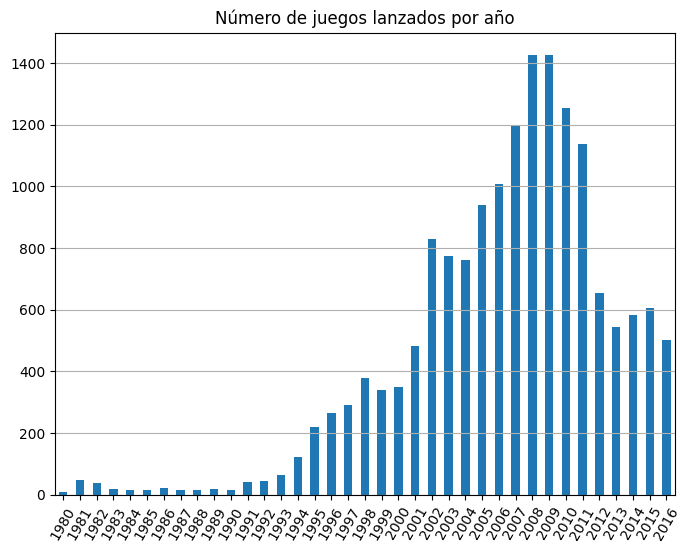

In [26]:
year_count.plot(kind='bar', title='Número de juegos lanzados por año', figsize=(8,6), rot=60)
plt.grid(axis='y')
plt.show()

Se observa que hubo mayor cantidad de juegos lanzados entre 2007 y 2011, y en 2012 hay un decremento significativo de juegos lanzados en comparación con el año anterior. También, en el 2002 hubo un incremento significativo respecto al 2001.

### Plataformas a lo largo del tiempo

Se analiza la suma de ventas de las plataformas más populares a lo largo del tiempo; el filtro sigue contemplando los juegos cuyo año de lanzamiento fue modificado a 9999 (Inicialmente N/A), para incluir el mismo en el total de ventas por cada plataforma.

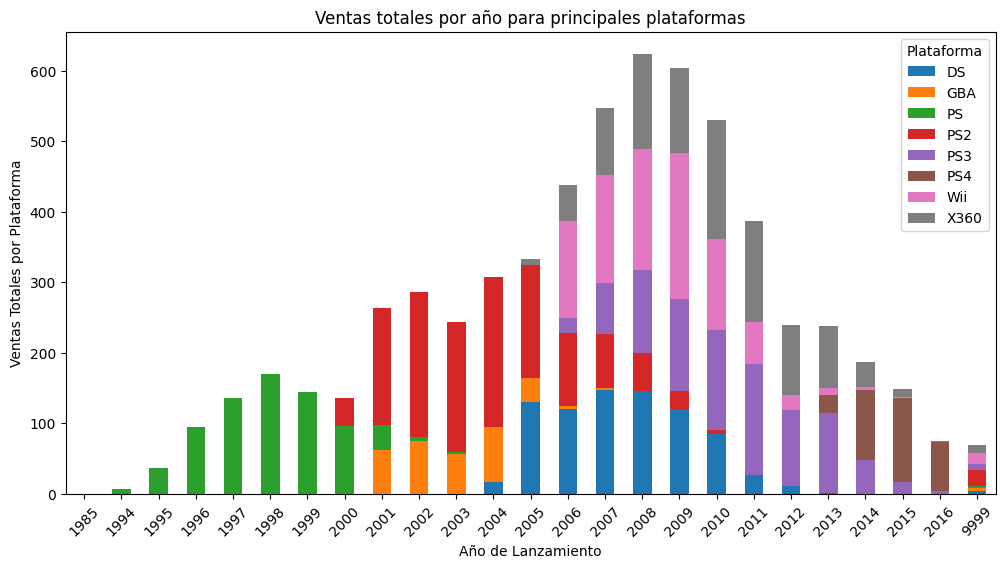

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14


In [27]:
# Busca las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. 
platform_sales = df_games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
top_platforms = platform_sales.head(8)
platform_filter = df_games[df_games['platform'].isin(top_platforms['platform'])]

sales_by_year_filtered = platform_filter.groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()
#sales_by_year_filtered = sales_by_year_filtered['year_of_release']!=9999
#sales_by_year_filtered

sales_by_year_filtered.plot(kind='bar',  stacked=True, figsize=(12, 6), rot=45)
plt.title('Ventas totales por año para principales plataformas')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales por Plataforma')
plt.legend(title='Plataforma')
plt.show()

top_platforms

In [28]:
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas.

# Sacar la media y mediana del total de ventas de cada plataforma
platform_sales_mean = platform_sales['total_sales'].mean()
platform_sales_median = platform_sales['total_sales'].median()

# Obtener el último año registrado
df_filter_years = df_games[df_games['year_of_release']!=9999]
last_year_registered = df_filter_years['year_of_release'].max()

# Obtener primer y último año de cada plataforma
platform_first_year = df_filter_years.groupby('platform')['year_of_release'].min().reset_index()
platform_first_year.columns = ['platform','first_year']
platform_last_year = df_filter_years.groupby('platform')['year_of_release'].max().reset_index()
platform_last_year.columns = ['platform','last_year']

df_platforms = platform_sales.merge(platform_first_year, on='platform').merge(platform_last_year,on='platform')
#df_platforms

filtered_platforms = df_platforms[(df_platforms['total_sales'] > platform_sales_median) & (df_platforms['last_year'] < last_year_registered)].reset_index()

# Mostrar el resultado
print(filtered_platforms[['platform', 'total_sales', 'first_year', 'last_year']])


  platform  total_sales  first_year  last_year
0      PS2      1255.77        2000       2011
1       DS       806.12        1985       2013
2       PS       730.86        1994       2003
3      GBA       317.85        2000       2007
4      PSP       294.05        2004       2015
5       XB       257.74        2000       2008
6       GB       255.46        1988       2001
7      NES       251.05        1983       1994
8      N64       218.68        1996       2002


Se obtuvo una lista de las plataformas cuyas ventas totales superan la mediana (se utilizó como criterio la mediana que es menor en comparación a la media) y que dejaron de tener ventas en el último año, el resultado es de 9 plataformas que fueron populares y dejaron de tener ventas.

In [29]:
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
mean_platform_first_year = platform_first_year['first_year'].max() - platform_first_year['first_year'].mean()
print('Años promedio en aparecer:',int(mean_platform_first_year.round()))

Años promedio en aparecer: 15


In [30]:
mean_platform_last_year = platform_last_year['last_year'].max() - platform_last_year['last_year'].mean()
print('Años promedio en desaparecer:',int(mean_platform_last_year.round()))

Años promedio en desaparecer: 11


### Periodo relevante

Para el análisis se utilizará un periodo de 5 años: de 2011 a 2016. Se modificará el dataframe de manera que muestre únicamente los juegos a partir del 2011.

In [31]:
df_games_filtered = df_games[df_games['year_of_release']>2011].reset_index(drop=True)
df_games_filtered

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.000000,8.200000,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,75.171429,6.697143,unknown,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,72.576923,7.626923,unknown,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.000000,5.300000,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
3150,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.400000,7.775000,unknown,0.01
3151,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,77.750000,7.925000,unknown,0.01
3152,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,69.024896,6.917045,unknown,0.01
3153,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71.400000,7.775000,unknown,0.01


In [32]:
# ¿Qué plataformas son líderes en ventas?
platform_total_sales = df_games_filtered.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
platform_total_sales

,platform,total_sales
0,PS4,314.14
1,PS3,297.10
2,X360,246.72
3,3DS,195.80
4,XOne,159.32
5,WiiU,82.19
6,PC,66.41
7,Wii,51.70
8,PSV,49.44
9,PS2,22.21


Se obtiene que para el periodo relevante, las mejores ventas las tiene PS4, PS3 y X360

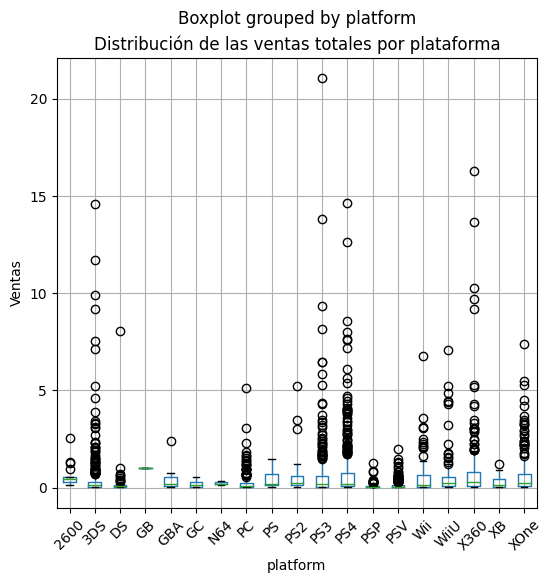

In [33]:
# Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. 
# ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas?
box = df_games_filtered.boxplot(column="total_sales", by="platform", figsize=(6,6),rot=45)
box.set_ylabel("Ventas")
box.set_title("Distribución de las ventas totales por plataforma")
plt.show()

Las ventas promedio de las plataformas difieren entre ellas y además la mayoría de estas tienen juegos con valores fuera del rango intercuartil.

In [34]:
platform_mean_sales = df_games_filtered.groupby('platform')['total_sales'].mean()
platform_mean_sales

platform
2600    0.617647
3DS     0.484653
DS      0.260492
GB      1.030000
GBA     0.451818
GC      0.157143
N64     0.223333
PC      0.248727
PS      0.468571
PS2     0.653235
PS3     0.573552
PS4     0.801378
PSP     0.083122
PSV     0.120000
Wii     0.587500
WiiU    0.559116
X360    0.766211
XB      0.293810
XOne    0.645020
Name: total_sales, dtype: float64

### Reseñas de usuarios

In [35]:
# Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). 
# Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
df_x360 = df_games_filtered[df_games_filtered['platform']=='X360'].reset_index(drop=True)
df_x360['avg_score'] = (df_x360['critic_score'] + df_x360['user_score']*10) / 2
df_x360


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,avg_score
0,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27,89.000000
1,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.000000,4.800000,M,13.68,65.500000
2,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.000000,2.600000,M,10.24,49.500000
3,Halo 4,X360,2012,Shooter,6.65,2.28,0.04,0.74,87.000000,7.000000,M,9.71,78.500000
4,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,67.694444,6.486957,unknown,9.18,66.282005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,Turbo: Super Stunt Squad,X360,2013,Sports,0.00,0.01,0.00,0.00,69.541401,4.500000,E,0.01,57.270701
318,Young Justice: Legacy,X360,2013,Action,0.00,0.01,0.00,0.00,67.118367,6.200000,T,0.01,64.559184
319,Ride,X360,2015,Racing,0.00,0.01,0.00,0.00,70.402597,6.702564,unknown,0.01,68.714119
320,Dragon Ball Z for Kinect,X360,2012,Fighting,0.01,0.00,0.00,0.00,49.000000,2.100000,T,0.01,35.000000


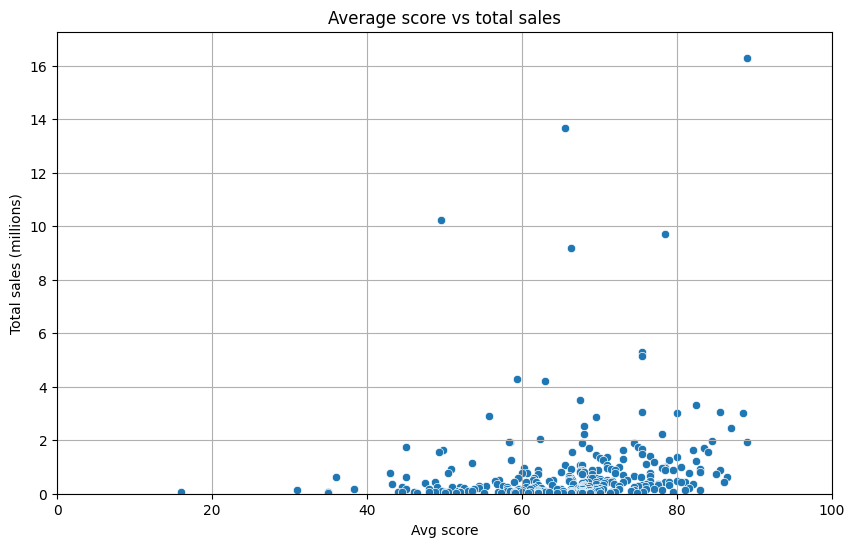

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_x360, x='avg_score', y='total_sales')


plt.title('Average score vs total sales')
plt.xlabel('Avg score')
plt.ylabel('Total sales (millions)')
plt.xlim(0, 100)
plt.ylim(0, df_x360['total_sales'].max()+1)
plt.grid()

# Show the plot
plt.show()

No se encuentra relación alguna entre las ventas y las reseñas para la plataforma X360

In [34]:
# Teniendo en cuenta las conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [35]:
games_in_x360 = df_x360.groupby('name')['total_sales'].sum().sort_values(ascending=False).reset_index()

top_games_in_x360 = games_in_x360.head()
top_games_in_x360

games_comparison = df_games_filtered[df_games_filtered['name'].isin(top_games_in_x360['name'])]
games_in_x360_comparison = games_comparison.groupby(['name','platform'])['total_sales'].sum().reset_index().sort_values(by=['name','total_sales'], ascending=False)
games_in_x360_comparison



,name,platform,total_sales
20,Minecraft,X360,9.18
16,Minecraft,PS3,5.27
17,Minecraft,PS4,4.32
21,Minecraft,XOne,2.76
18,Minecraft,PSV,1.96
19,Minecraft,WiiU,0.67
15,Halo 4,X360,9.71
11,Grand Theft Auto V,PS3,21.05
13,Grand Theft Auto V,X360,16.27
12,Grand Theft Auto V,PS4,12.62


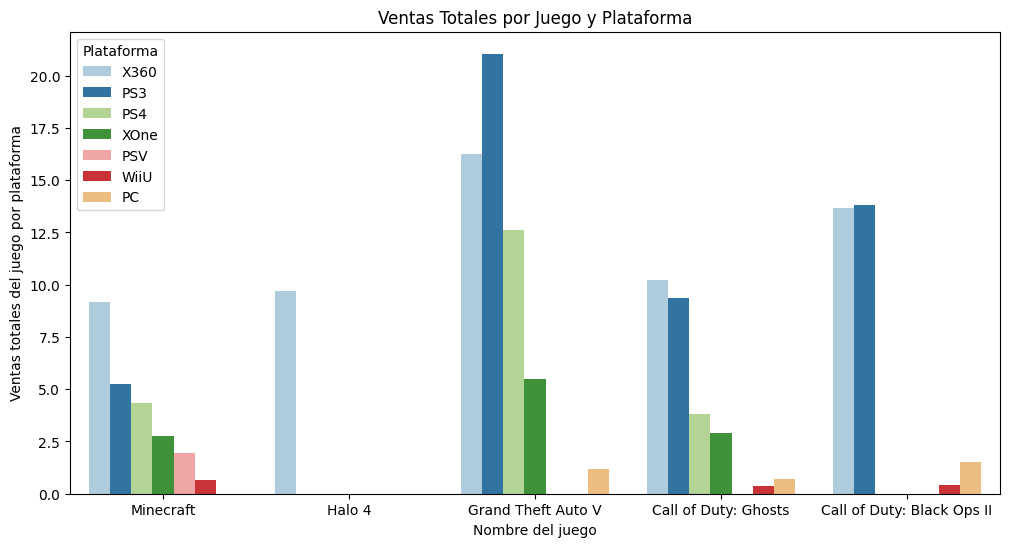

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(data=games_in_x360_comparison, x="name", y="total_sales", hue="platform", palette = 'Paired')

plt.title("Ventas Totales por Juego y Plataforma")
plt.xlabel("Nombre del juego")
plt.ylabel("Ventas totales del juego por plataforma")
plt.legend(title="Plataforma")


plt.show()

### Géneros

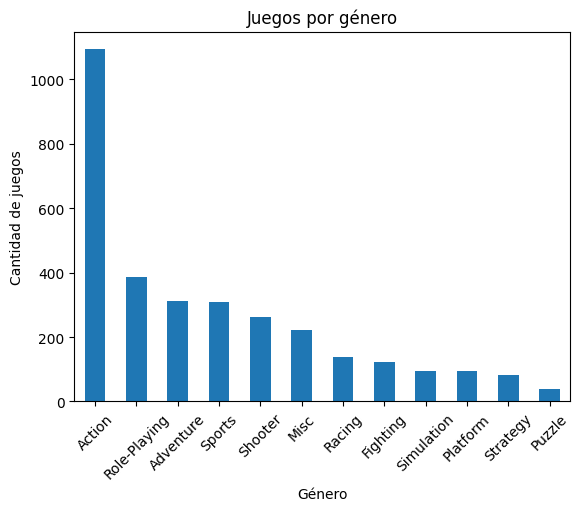

In [37]:
# Echa un vistazo a la distribución general de los juegos por género. 
games_by_genre = df_games_filtered.groupby('genre')['name'].count().sort_values(ascending=False)
games_by_genre.plot(kind='bar', title='Juegos por género', xlabel='Género', ylabel='Cantidad de juegos', rot = 45)

plt.show()


El género de juegos más popular es Acción.

In [38]:
# ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

sales_by_genre = df_games_filtered.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
sales_by_genre

,genre,total_sales
0,Action,468.77
1,Shooter,315.82
2,Sports,202.67
3,Role-Playing,196.28
4,Misc,97.26
5,Platform,63.22
6,Racing,58.68
7,Fighting,49.36
8,Simulation,37.13
9,Adventure,33.69


In [39]:
games_by_genre = games_by_genre.reset_index()
games_by_genre.rename(columns={'name':'game_count'},inplace=True)
sales_by_games_and_genre = games_by_genre.merge(sales_by_genre, on='genre')
sales_by_games_and_genre['profitability_ratio'] = sales_by_games_and_genre['total_sales'] / sales_by_games_and_genre['game_count']
sales_by_games_and_genre.sort_values(by='profitability_ratio',ascending=False)

,genre,game_count,total_sales,profitability_ratio
4,Shooter,262,315.82,1.205420
9,Platform,95,63.22,0.665474
3,Sports,310,202.67,0.653774
1,Role-Playing,387,196.28,0.507183
5,Misc,221,97.26,0.440090
0,Action,1093,468.77,0.428884
6,Racing,138,58.68,0.425217
7,Fighting,121,49.36,0.407934
8,Simulation,96,37.13,0.386771
11,Puzzle,39,7.57,0.194103


Se observa que el género más rentable es 'Shooter', tomando en cuenta el ratio de rentabilidad. El género acción, a pesar de ser el más popular, no es el más rentable.

### Análisis por región

In [40]:
# Crea un perfil de usuario para cada región
df_na = df_games_filtered.drop(columns=['eu_sales','jp_sales', 'other_sales', 'total_sales'])
df_eu = df_games_filtered.drop(columns=['na_sales','jp_sales', 'other_sales', 'total_sales'])
df_jp = df_games_filtered.drop(columns=['na_sales','eu_sales', 'other_sales', 'total_sales'])


In [41]:
# Determina las cinco plataformas principales de cada región
na_main_platforms = df_na.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
eu_main_platforms = df_eu.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
jp_main_platforms = df_jp.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()

na_main_platforms, eu_main_platforms, jp_main_platforms


(  platform  na_sales
 0     X360    146.78
 1      PS4    108.74
 2      PS3    106.74
 3     XOne     93.12
 4      3DS     56.15,
   platform  eu_sales
 0      PS4    141.09
 1      PS3    109.94
 2     X360     76.96
 3     XOne     51.59
 4      3DS     42.85,
   platform  jp_sales
 0      3DS     87.84
 1      PS3     36.07
 2      PSV     21.11
 3      PS4     15.96
 4     WiiU     13.01)

In [42]:
# Determina los cinco géneros principales de cada región. Explica la diferencia
na_main_genres = df_na.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
eu_main_genres = df_eu.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
jp_main_genres = df_jp.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()

na_main_genres, '', eu_main_genres, '', jp_main_genres,

(          genre  na_sales
 0        Action    193.68
 1       Shooter    152.18
 2        Sports     94.76
 3  Role-Playing     64.77
 4          Misc     45.89,
 '',
           genre  eu_sales
 0        Action    167.48
 1       Shooter    116.29
 2        Sports     74.55
 3  Role-Playing     49.00
 4        Racing     29.31,
 '',
           genre  jp_sales
 0  Role-Playing     67.46
 1        Action     54.09
 2          Misc     13.95
 3    Simulation     10.57
 4      Fighting      9.64)

Role-Playing y Acción son géneros populares en las tres regiones. PS3 es la plataforma que es popular en las tres regiones.

### Análisis por clasificación ESRB 

In [43]:
#Determina si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

df_na_rating = df_na.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index()
df_na_rating

,rating,na_sales
0,M,237.16
1,E,133.12
2,unknown,118.15
3,E10+,83.52
4,T,78.17
5,RP,0.00


In [44]:
df_eu_rating = df_eu.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index()
df_eu_rating

,rating,eu_sales
0,M,197.93
1,E,119.41
2,unknown,95.15
3,E10+,60.54
4,T,58.20
5,RP,0.05


In [45]:
df_jp_rating = df_jp.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index()
df_jp_rating

,rating,jp_sales
0,unknown,114.03
1,E,28.48
2,T,26.72
3,M,21.86
4,E10+,8.19
5,RP,0.00


Se observa que el rating de los juegos en Norte Armérica y Europa tiene una tendencia similar respecto a las ventas, sin embargo en Japón no se observa tal tendencia.

## Pruebas de Hipótesis

### Primera prueba

Se prueba la hipótesis de que las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

Se establece:

-Hipótesis nula: las calificaciones de usuario promedio de las dos plataformas son iguales

-Hipótesis alternativa: las calificaciones de usuario promedio de las dos plataformas no son iguales

Para probar esta hipótesis de que las medias de las calificaciones de usuario de las plataformas son iguales según las muestras tomadas de ellas, se aplicará la función scipy.stats.ttest_ind, estableciendo el parámetro equal_var=False debido a que las varianzas no se consideran iguales.

Se establece un nivel de significancia estadística crítica de alpha = 0.05, con el fin de tener un 95% de confianza en los resultados.

In [46]:
# Revisión de total y varianza de cada población
df_xone = df_games_filtered[df_games_filtered['platform']=='XOne']
print('Población total de calificaciones de usuarios para Xbox One:', df_xone['user_score'].count())

df_pc = df_games_filtered[df_games_filtered['platform']=='PC']
print('Población total de calificaciones de usuarios para PC:', df_pc['user_score'].count())

print()
print('Varianza de las calificaciones de usuarios para Xbox One:', np.var(df_xone['user_score']))
print('Varianza de las calificaciones de usuarios para PC:', np.var(df_pc['user_score']))

#print()
#print('Media de las calificaciones de usuarios para Xbox One:', df_xone['user_score'].mean())
#print('Media de las calificaciones de usuarios para PC:', df_pc['user_score'].mean())



Población total de calificaciones de usuarios para Xbox One: 247
Población total de calificaciones de usuarios para PC: 267

Varianza de las calificaciones de usuarios para Xbox One: 1.4684781692615487
Varianza de las calificaciones de usuarios para PC: 2.3298997795898786


Para esta prueba se obtiene una muestra de 100 usuarios de cada plataforma para homogeneizar las muestras y tener que ambas muestras son > 30.  

In [47]:
# Establecer muestra
np.random.seed(1)
df_xone_sample = df_xone['user_score'].sample(100)
df_pc_sample = df_pc['user_score'].sample(100)

# Prueba de hipótesis
alpha = 0.05  
results = st.ttest_ind(df_xone_sample, df_pc_sample, equal_var=False)

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  0.48568128728073634
No podemos rechazar la hipótesis nula


El valor p 0.4856 (utilizando random seed 1) cae en el umbral de no rechazo de la hipótesis nula. Este valor indica que aunque las calificaciones de usuario promedio para las dos plataformas son diferentes, existe un 48.56% de probabilidad de obtener aleatoriamente una diferencia de ese tamaño o mayor. Esta probabilidad demasiado alta para concluir que existe una diferencia significativa entre las calificaciones de usuario de ambas plataformas.


### Segunda prueba

Se prueba la hipótesis de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Se establece:

-Hipótesis nula: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

-Hipótesis alternativa: las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Para probar esta hipótesis de que las medias de las calificaciones de usuario de los géneros Acción y Deportes son iguales, según las muestras tomadas de ellas, se aplicará la función scipy.stats.ttest_ind, estableciendo el parámetro equal_var=False debido a que las varianzas no se consideran iguales.

Se establece un nivel de significancia estadística crítica de alpha = 0.05, con el fin de tener un 95% de confianza en los resultados.

In [48]:
# Revisión de total y varianza de cada población
df_genre_action = df_games_filtered[df_games_filtered['genre']=='Action']
print('Población total de calificaciones de usuarios para género Acción:', df_genre_action['user_score'].count())

df_genre_sports = df_games_filtered[df_games_filtered['genre']=='Sports']
print('Población total de calificaciones de usuarios para género Deportes:', df_genre_sports['user_score'].count())

print()
print('Varianza de las calificaciones de usuarios para Xbox One:', np.var(df_genre_action['user_score']))
print('Varianza de las calificaciones de usuarios para PC:', np.var(df_genre_sports['user_score']))

#print()
#print('Media de las calificaciones de usuarios para Xbox One:', df_genre_action['user_score'].mean())
#print('Media de las calificaciones de usuarios para PC:', df_genre_sports['user_score'].mean())



Población total de calificaciones de usuarios para género Acción: 1093
Población total de calificaciones de usuarios para género Deportes: 310

Varianza de las calificaciones de usuarios para Xbox One: 1.0015511682339053
Varianza de las calificaciones de usuarios para PC: 2.4470581142775747


Para esta prueba se obtendrá de igual manera una muestra de 100 usuarios de cada género para homogeneizar las muestras y tener que ambas muestras son > 30.

In [49]:
# Establecer muestra
np.random.seed(1)
df_action_sample = df_genre_action['user_score'].sample(100)
df_sports_sample = df_genre_sports['user_score'].sample(100)

# Prueba de hipótesis
#alpha = 0.05  
results = st.ttest_ind(df_action_sample, df_sports_sample, equal_var=False)

print('valor p: ', results.pvalue) 

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  2.766555108236377e-07
Rechazamos la hipótesis nula


El valor p 0.000000027665 (utilizando random seed 1) cae en el umbral de rechazo de la hipótesis nula. Esta probabilidad demasiado baja para concluir que existe una diferencia significativa entre las calificaciones de usuario de ambas plataformas. Con un 95% de confianza se rechaza la hipótesis de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales

## Conclusión general

Parte fundamental de este proyecto ha sido la preparación de los datos, en donde se encontraron altos niveles de información faltante. Ha sido importante tomar en cuenta las medias por grupos de plataformas y géneros para no generalizar y rellenar valores demasiado globales en campos importantes como critic score y user score. 

Con la información generada a partir de los resultados obtenidos, se puede tomar en cuenta las plataformas y géneros principales en cada región así como de manera global, y si las críticas afectan o no las ventas, para efectos del principal objetivo del proyecto.

Un descubrimiento importante a tomar en cuenta es el ratio de rentabilidad de cada género, donde se concluye que el hecho de que un género sea popular no asegura que será del todo rentable.

Con base en el análisis, también se puede tomar en cuenta las plataformas que continuarán siendo populares para enfocar futuros proyectos y campañas en las mismas.

A manera de reflexión final: la demanda de este proyecto requirió el uso y combinación de gran diversidad de métodos y fórmulas tanto para la preparación de los datos como para su posterior análisis. El pensamiento crítico continúa desarrollándose de tal manera que se indaga acerca de la información obtenida para una mejor comprensión de los resultados.